In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [34]:
train = pd.read_csv(r"C:\Users\Mahesh\OneDrive\Documents\Datasets\sonar_csv.csv")
train.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [35]:
train.shape

(208, 61)

In [36]:
train.isnull().sum()

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
               ..
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
Class           0
Length: 61, dtype: int64

In [37]:
print(train[train['Class'] == 'Rock'].count())

attribute_1     97
attribute_2     97
attribute_3     97
attribute_4     97
attribute_5     97
                ..
attribute_57    97
attribute_58    97
attribute_59    97
attribute_60    97
Class           97
Length: 61, dtype: int64


In [38]:
print(train[train['Class'] == 'Mine'].count())

attribute_1     111
attribute_2     111
attribute_3     111
attribute_4     111
attribute_5     111
               ... 
attribute_57    111
attribute_58    111
attribute_59    111
attribute_60    111
Class           111
Length: 61, dtype: int64


<AxesSubplot:>

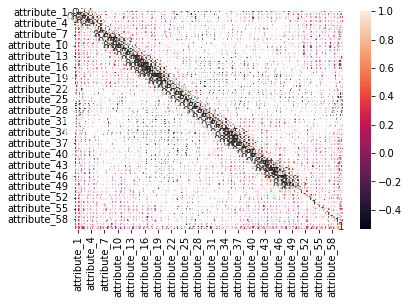

In [39]:
corr_data = train.corr()
sb.heatmap(corr_data, annot = True)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Class',axis=1), 
                                   train['Class'], test_size=0.30, random_state=100)

In [42]:
X_train.shape

(145, 60)

In [43]:
y_train.shape

(145,)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression(C=0.01, solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [46]:
y_pred = logmodel.predict(X_test)

In [47]:
print('Accuracy of Training set: {:.2f}'.format(logmodel.score(X_train, y_train)))
print('Accuracy of Test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of Training set: 0.66
Accuracy of Test set: 0.63


In [48]:
from sklearn import metrics

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[32  5]
 [18  8]]

True Positives(TP) =  32

True Negatives(TN) =  8

False Positives(FP) =  5

False Negatives(FN) =  18


<AxesSubplot:>

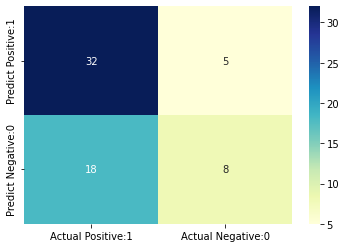

In [51]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Mine       0.64      0.86      0.74        37
        Rock       0.62      0.31      0.41        26

    accuracy                           0.63        63
   macro avg       0.63      0.59      0.57        63
weighted avg       0.63      0.63      0.60        63



In [54]:
logmodel = LogisticRegression(C = 100, max_iter = 50, solver='liblinear', random_state=10)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
print('Accuracy of Training set: {:.2f}'.format(logmodel.score(X_train, y_train)))
print('Accuracy of Test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of Training set: 0.92
Accuracy of Test set: 0.81


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
# Training the scaler, which standarizes all the features to have mean=0 and unit variance

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [57]:
# Applying the scaler to the feature training data:

features_train_std = sc.transform(X_train)
features_train_std

array([[-0.36443656, -0.79893071, -0.58221213, ...,  0.48296906,
         1.49941973,  1.30428752],
       [-0.6960804 , -0.80198698,  0.01131362, ..., -1.18685827,
        -0.7616487 , -0.73337443],
       [ 0.64293161,  0.42969084,  1.04807318, ..., -0.50529609,
        -0.42602135, -0.39059018],
       ...,
       [ 0.29056003,  0.06293814, -0.29181756, ..., -0.19859312,
         0.03325817,  0.06645549],
       [-0.02035607,  0.79949981, -0.10586314, ...,  1.38603894,
         0.33355632, -1.01902798],
       [-0.31054443, -0.02263749,  0.13358502, ...,  0.2444223 ,
        -0.30236917, -0.80954871]])

In [58]:
# Applying the Same scaler to the feature test data

features_test_std = sc.transform(X_test)
features_test_std

array([[-0.93652218, -1.08622032, -0.8726067 , ..., -0.7268038 ,
        -1.13260524, -0.52389517],
       [-0.58000505, -0.43829055, -0.71722013, ..., -0.55641326,
        -0.95595927, -0.82859228],
       [-0.71680814, -0.70418626, -0.54400231, ..., -0.64160853,
         0.17457495, -0.1239802 ],
       ...,
       [-0.95310438, -0.45968446,  0.20745732, ..., -0.45417893,
         2.08235144,  0.77106757],
       [-0.33541772, -0.12960703, -0.1007685 , ..., -0.82903813,
        -1.11494064,  0.08549906],
       [-0.11570367, -0.67056726, -0.23068186, ...,  0.26146135,
         0.51020229,  0.54254473]])

In [59]:
logmodel = LogisticRegression(C=100, max_iter = 50, solver='liblinear', random_state=10)
logmodel.fit(features_train_std, y_train)
y_pred = logmodel.predict(features_test_std)
print('Accuracy of Training set: {:.2f}'.format(logmodel.score(features_train_std, y_train)))
print('Accuracy of Test set: {:.2f}'.format(logmodel.score(features_test_std, y_test)))

Accuracy of Training set: 1.00
Accuracy of Test set: 0.81


In [60]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[30  7]
 [ 5 21]]

True Positives(TP) =  30

True Negatives(TN) =  21

False Positives(FP) =  7

False Negatives(FN) =  5


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Mine       0.89      0.89      0.89        37
        Rock       0.85      0.85      0.85        26

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



<AxesSubplot:>

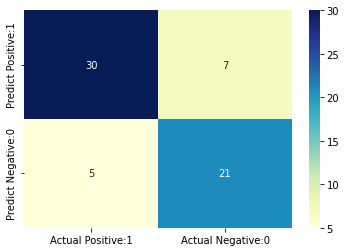

In [67]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')